---
# Data Analysis of a Car Resale Hub

- This data is the collection of various cars and their attributes along with some details about its market value.
- It is not a large data set.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set('notebook')


In [2]:
df = pd.read_csv('../input/httpswwwkagglecomaayushmishra1512carsales/Car_sales.csv')

So first let's review how and what the data looks like

In [3]:
df.head(10)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


As it is obvious that some of the columns have very unusual names, so i will first shorten them to make the columns more relatable

In [4]:
df.rename(columns = {"Sales_in_thousands": "Sales(k)", "__year_resale_value": "Resale_value(k)", "Price_in_thousands" : "Prices(k)"}, inplace=True)

Now let's see the data from a statistical point of view

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales(k),157.0,52.998076,68.029422,0.110000,14.114000,29.450000,67.956000,540.561000
Resale_value(k),121.0,18.072975,11.453384,5.160000,11.260000,14.180000,19.875000,67.550000
Prices(k),155.0,27.390755,14.351653,9.235000,18.017500,22.799000,31.947500,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,2.300000,3.000000,3.575000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,149.500000,177.500000,215.000000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,103.000000,107.000000,112.200000,138.700000
Width,156.0,71.150000,3.451872,62.600000,68.400000,70.550000,73.425000,79.900000
Length,156.0,187.343590,13.431754,149.400000,177.575000,187.900000,196.125000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.971000,3.342000,3.799500,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,15.800000,17.200000,19.575000,32.000000


---
Before starting to analyse data, we should first clean it up, by removing **null** values *(if any)*
- So first we check which columns have null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Manufacturer       157 non-null    object 
 1   Model              157 non-null    object 
 2   Sales(k)           157 non-null    float64
 3   Resale_value(k)    121 non-null    float64
 4   Vehicle_type       157 non-null    object 
 5   Prices(k)          155 non-null    float64
 6   Engine_size        156 non-null    float64
 7   Horsepower         156 non-null    float64
 8   Wheelbase          156 non-null    float64
 9   Width              156 non-null    float64
 10  Length             156 non-null    float64
 11  Curb_weight        155 non-null    float64
 12  Fuel_capacity      156 non-null    float64
 13  Fuel_efficiency    154 non-null    float64
 14  Latest_Launch      157 non-null    object 
 15  Power_perf_factor  155 non-null    float64
dtypes: float64(12), object(4)


In [7]:
ind = df['Resale_value(k)'].dropna().index.tolist()
df = df.loc[ind, :]

In [8]:
ls = df.dtypes
for i in ls.index:
    if ls[i] == float:
        df[i] = df[i].fillna(round(np.mean(df[i]),5))

In [9]:
df.reset_index(inplace=True)

 - Let's check if all the is normally distributed or not

---
But, i am first going to eliminate the unnecessary columns that we are not going to use

In [10]:
df = df[["Manufacturer","Sales(k)","Resale_value(k)","Prices(k)","Engine_size","Horsepower","Fuel_capacity","Fuel_efficiency","Latest_Launch","Power_perf_factor"]]

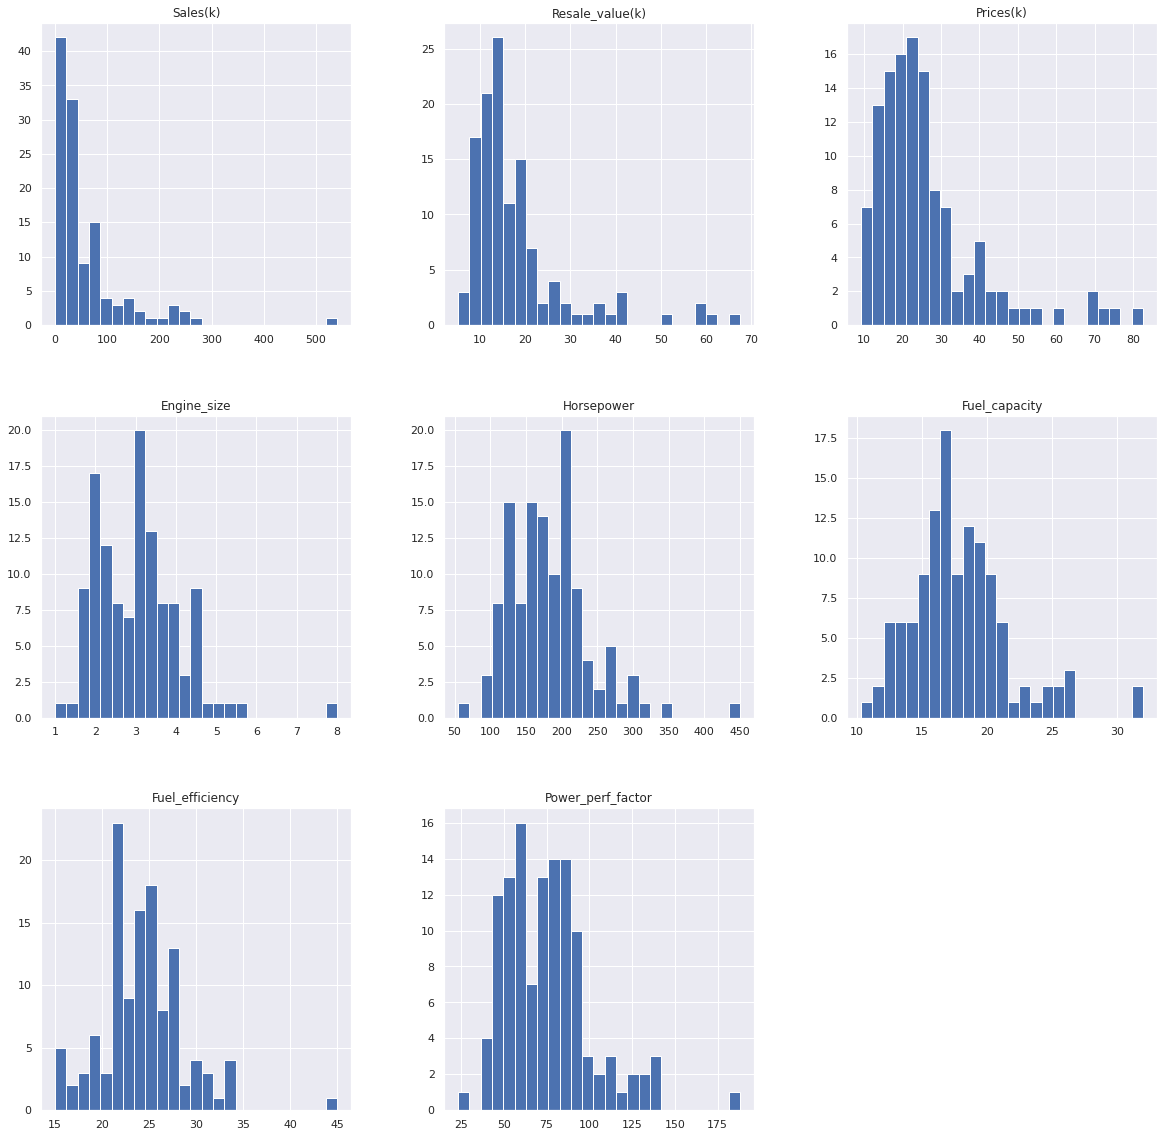

In [11]:
axlist = df.hist(bins = 25, figsize = (20,20))

- Now, we find out the skewness of the columns

In [12]:
skew_cols = df.skew()
skew_cols = skew_cols[abs(skew_cols.values) > 1]

In [13]:
skew_cols

Sales(k)             3.206734
Resale_value(k)      2.294915
Prices(k)            1.924707
Engine_size          1.102735
Horsepower           1.157867
Fuel_capacity        1.115784
Power_perf_factor    1.244354
dtype: float64

In [14]:
sdf = pd.DataFrame()
sdf[skew_cols.index] = np.sqrt(df[skew_cols.index])
sdf['Manufacturer'] = df['Manufacturer']

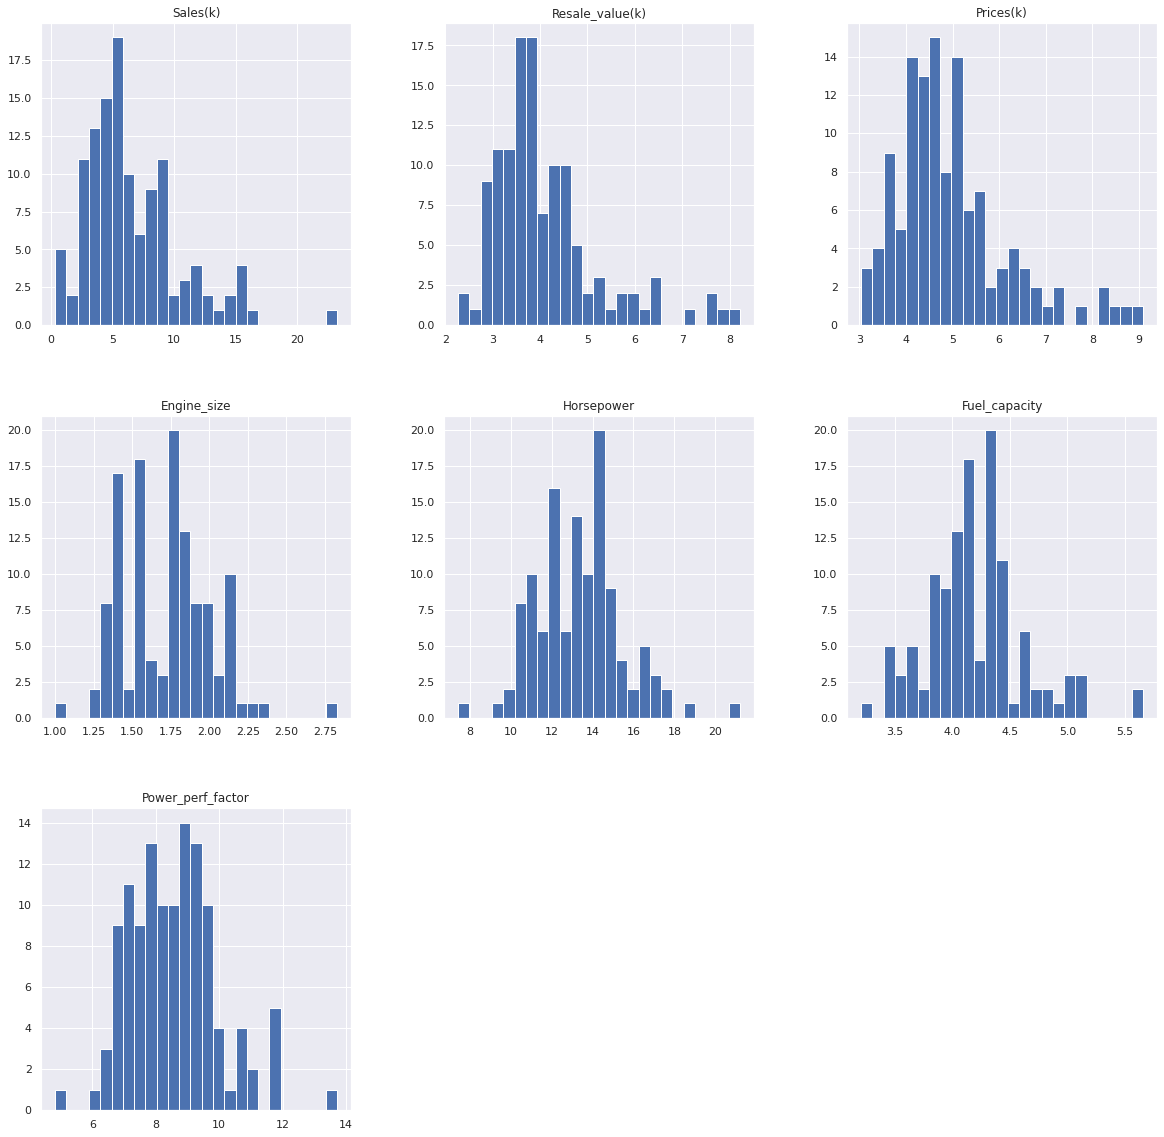

In [15]:
axlist = sdf.hist(bins = 25, figsize = (20,20))

As we can see that all of the skew columns have been normalized to some extent.

---

- Now, we can move ahead with hypothesis testing

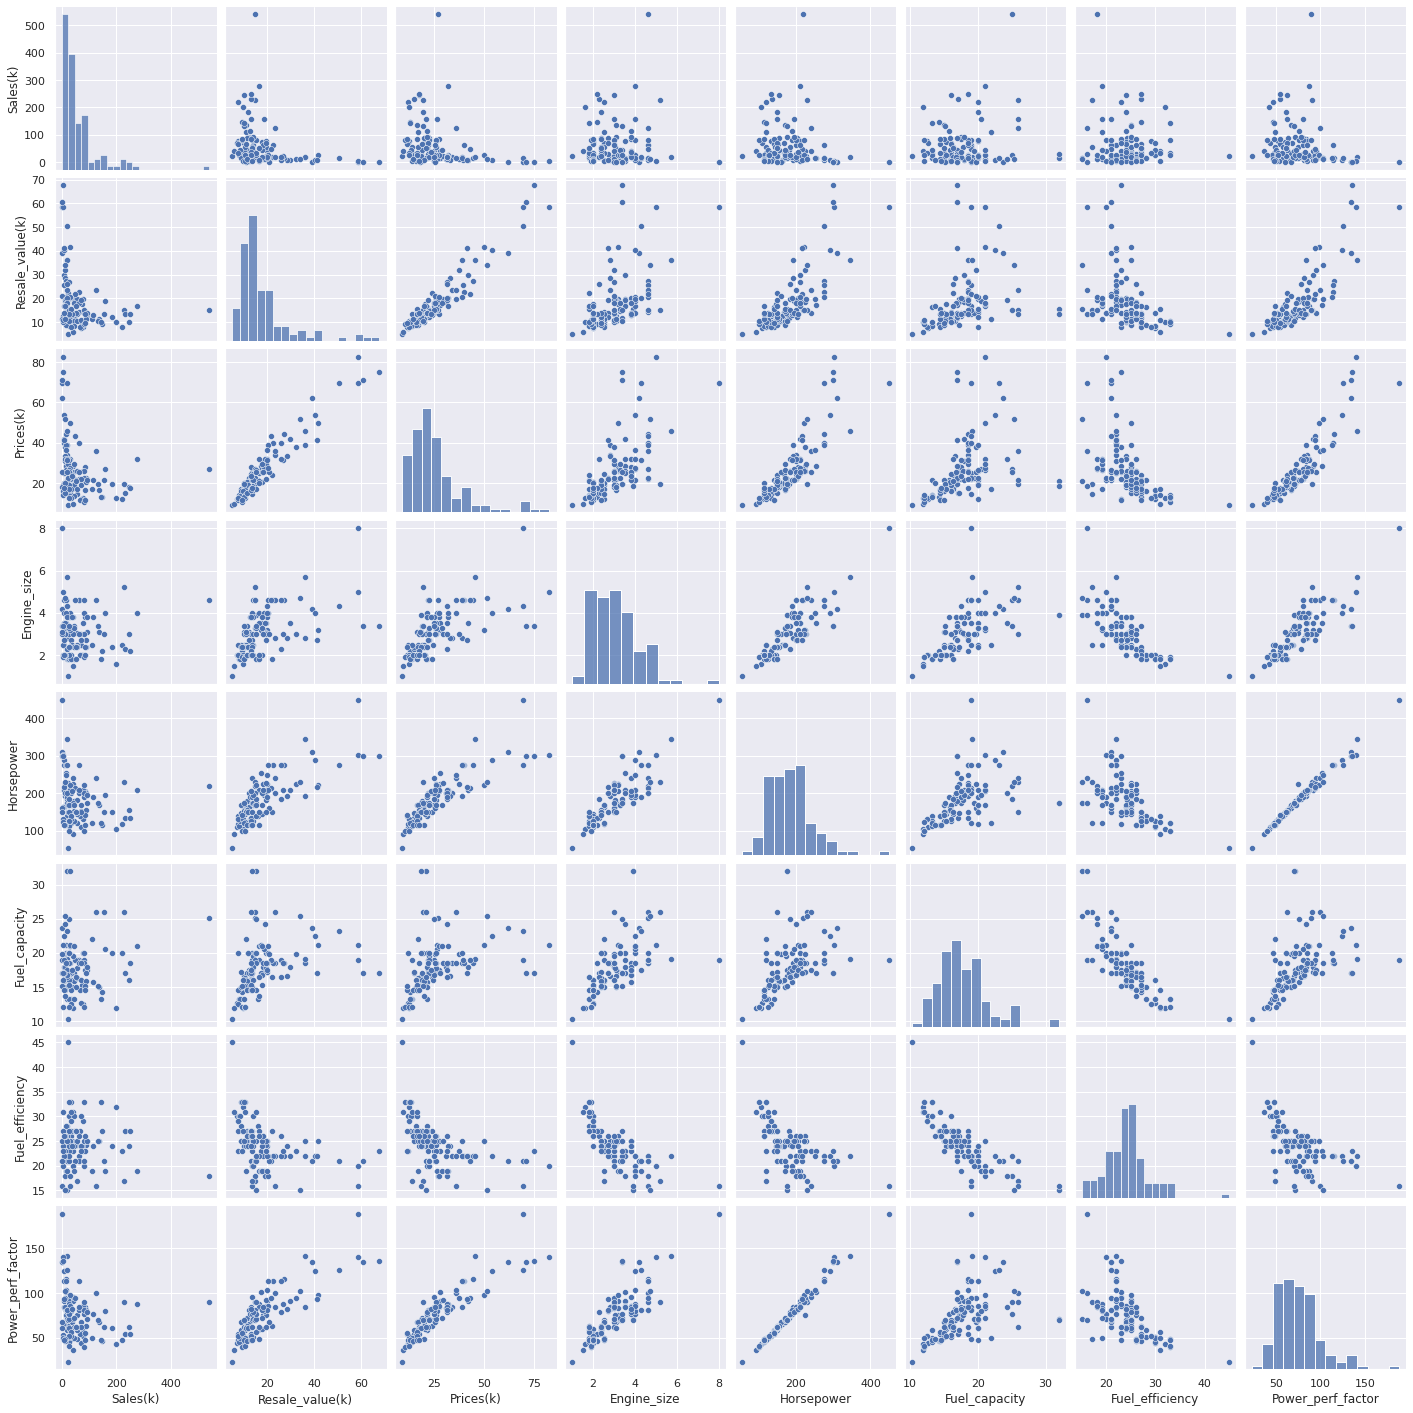

In [16]:
sns.pairplot(df)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales(k),121.0,58.576083,74.063448,0.110000,15.94300,32.299000,76.029000,540.561000
Resale_value(k),121.0,18.072975,11.453384,5.160000,11.26000,14.180000,19.875000,67.550000
Prices(k),121.0,26.095882,14.017067,9.235000,17.03500,22.195000,29.465000,82.600000
Engine_size,121.0,3.060000,1.047569,1.000000,2.30000,3.000000,3.800000,8.000000
Horsepower,121.0,182.600000,58.391124,55.000000,140.00000,175.000000,210.000000,450.000000
Fuel_capacity,121.0,17.806667,3.732509,10.300000,15.70000,17.200000,19.500000,32.000000
Fuel_efficiency,121.0,24.117647,4.338157,15.000000,22.00000,24.000000,26.000000,45.000000
Power_perf_factor,121.0,75.322442,25.612140,23.276272,56.49603,71.171664,85.828408,188.144323


Before be begin Hypothesis Testing we import some important libraries

In [18]:
import math
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

If i want to compare the resale value of a car i need to account for its age as it depriciates when age increases

---
- So, i will turn Launch Date of each car to its age

In [19]:
from datetime import date

df['Latest_Launch'] = pd.DatetimeIndex(df['Latest_Launch']).year
df.rename(columns = {'Latest_Launch':'Launch Year'}, inplace=True)
df['Launch Year'].value_counts()
df['Age'] = date.today().year - df['Launch Year']
sdf['Age'] = df['Age']

- Now, let's use Polynomial Feature to find relation between **Resale Value** and **Age**

In [20]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3)
features = ['Resale_value(k)','Age']
pf.fit(df[features])
pf.get_feature_names()

['1',
 'x0',
 'x1',
 'x0^2',
 'x0 x1',
 'x1^2',
 'x0^3',
 'x0^2 x1',
 'x0 x1^2',
 'x1^3']

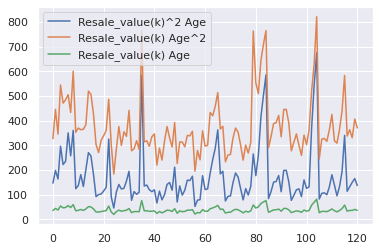

In [21]:
feature_arr = pf.transform(sdf[features])
feat_df = pd.DataFrame(feature_arr, columns = pf.get_feature_names(input_features = features))

columns = feat_df.columns.tolist()[-3:-1]
columns
for c in columns:
    plt.plot(feat_df[c], label = c)
plt.plot(feat_df['Resale_value(k) Age'], label = 'Resale_value(k) Age')
plt.legend()
plt.show()

As we can see that **Resale_value(k) Age** provides uniformity, so we pick this to add to the DataFrame

In [22]:
sdf['Resale_value*Age'] = feat_df['Resale_value(k) Age']

---

**Hypotesis Test - 1:**
<br>A salesman at the Resale Hub, claims that an average **Dodge** car has higher **Resale Value dependent on Age** than an **average** car at the Hub.

---
av = Average Resale * Age value
<br>
H0: μ = av
<br>
HA: μ > av

---
Here we are assuming value of 𝝰 = 0.05


First we trim the data so that we get a sample of only **Dodge** cars, and then find the average value of **Resale_value(k) Age** of the rest of the cars

In [23]:
dodge = sdf.loc[df['Manufacturer'] == 'Dodge']

In [24]:
dodge.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales(k),10.0,7.843851,4.637601,0.957079,4.463859,8.578464,10.258454,15.068543
Resale_value(k),10.0,3.897362,1.358542,2.783882,3.383621,3.522731,3.826545,7.646568
Prices(k),10.0,4.739316,1.309319,3.555278,4.323419,4.417292,4.587057,8.350150
Engine_size,10.0,1.840845,0.436258,1.414214,1.581139,1.612153,1.974842,2.828427
Horsepower,10.0,13.746879,2.891236,10.954451,12.377373,13.095119,13.966692,21.213203
Fuel_capacity,10.0,4.558030,0.718303,3.535534,4.030776,4.415517,4.996869,5.656854
Power_perf_factor,10.0,8.743951,1.894958,7.045921,7.894201,8.304988,8.851518,13.716571
Age,10.0,9.500000,0.527046,9.000000,9.000000,9.500000,10.000000,10.000000
Resale_value*Age,10.0,37.120769,13.998015,27.838822,31.886259,33.266026,34.864141,76.465679


In [25]:
dmean, dstd = dodge['Resale_value*Age'].agg([np.mean,np.std])
print(dmean,dstd,sep='\n')

37.120769381758315
13.998014958728724


In [26]:
data = sdf.copy()
sdf = sdf.loc[df['Manufacturer'] != 'Dodge']
mean = np.mean(sdf['Resale_value*Age'])
mean

39.35714210035886

We calculate the **p-value**

In [27]:
alpha = 0.05
z_score, pvalue = ztest(dodge['Resale_value*Age'], value=mean)
pvalue

0.6134066137947229

In [28]:
def check(pvalue:int, alpha: int):
    if pvalue < alpha:
        print("Null Hypothesis Rejected")
    else:
        print("We do not reject the null hypothesis")

We check if the **null hypothesis** can be accepted or not

In [29]:
check(pvalue, alpha)

We do not reject the null hypothesis


**Conclusion:**
<br>
So from the test, we conclude that the claim of the Salesman is **not true**, that is, an **Average Dodge car does not have more Resale value dependent on age** than Resale Value dependent on age of an **average car at the Hub**.

---


**Hypothesis Test - 2:**
<br>Now, the salesman claims that **All** cars that have **Horsepower greater than equal to 200**, has **Price** is more than **$32k**

---
H0: μ = 32k
<br>
HA: μ > 32k

---
Here we are assuming value of 𝝰 = 0.05


We trim the data so that we only have values for cars that have **Horsepower>=200**, then find the **sqrt of 32k** as it is the population mean

In [30]:
small_df = data.loc[df['Horsepower'] >= 200]

In [31]:
small_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales(k),47.0,5.744982,4.217106,0.957079,3.355722,4.462174,7.478120,23.249968
Resale_value(k),47.0,4.930238,1.250299,3.503570,4.075228,4.459821,5.557772,8.218881
Prices(k),47.0,5.996332,1.192542,4.411349,5.103716,5.639769,6.531647,9.088454
Engine_size,47.0,1.962017,0.227126,1.643168,1.788854,1.949359,2.144761,2.828427
Horsepower,47.0,15.372558,1.453405,14.142136,14.317821,14.866069,16.244549,21.213203
Fuel_capacity,47.0,4.413732,0.287093,4.098780,4.183300,4.301163,4.582576,5.099020
Power_perf_factor,47.0,9.916591,1.049025,8.678850,9.187478,9.558806,10.413077,13.716571
Age,47.0,9.510638,0.718463,9.000000,9.000000,9.000000,10.000000,13.000000
Resale_value*Age,47.0,46.952341,12.752744,31.532126,37.568782,42.591079,54.344563,82.188807


In [32]:
mean = np.sqrt(32)
pmean, pstd = small_df['Prices(k)'].agg([np.mean, np.std])
pmean

5.996331609338296

We calculate the **p-value**

In [33]:
alpha = 0.05
z_score2, pvalue2 = ztest(small_df['Prices(k)'], value=mean)
pvalue2

0.050988291674297186

We check if the **null hypothesis** can be accepted or not

In [34]:
check(pvalue2, alpha)

We do not reject the null hypothesis


**Conclusion:**
<br>
So from the test, we conclude that the claim of the Salesman is **not true**, that is, a car that has **Horsepower greater that equal 200 does not** have a value greater that **$32k**

---

**Hypothesis Test - 3:**
<br>The salesman makes a final attempt, and claims that for sure **every car** that has a **Price greater than and equal to $30k**, has **Horsepower greater 225**

---
H0: μ = 225
<br>
HA: μ > 225

---
Here we are assuming value of 𝝰 = 0.05

We trim the data so that we only have values for cars that have **Price>=$30k**, then find the **sqrt of 225 Horsepower** as it is the population mean

In [35]:
small_df = data.loc[df['Prices(k)'] >= 30]

In [36]:
small_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales(k),30.0,4.310241,3.131005,0.957079,2.947146,3.773660,4.438925,16.635715
Resale_value(k),30.0,5.618721,1.163366,4.079216,4.682269,5.280335,6.326849,8.218881
Prices(k),30.0,6.651691,1.048189,5.568662,5.791121,6.307132,7.160162,9.088454
Engine_size,30.0,1.974290,0.266870,1.516575,1.746252,2.000000,2.144761,2.828427
Horsepower,30.0,15.682536,1.739424,13.601471,14.361210,15.082875,16.583124,21.213203
Fuel_capacity,30.0,4.430172,0.288119,4.049691,4.257271,4.330031,4.590749,5.099020
Power_perf_factor,30.0,10.258047,1.162581,8.847640,9.282942,9.956670,11.054861,13.716571
Age,30.0,9.500000,0.508548,9.000000,9.000000,9.500000,10.000000,10.000000
Resale_value*Age,30.0,53.494628,12.097518,36.712940,43.923565,51.005258,58.234445,82.188807


In [37]:
mean = np.sqrt(225)
hmean, hstd = small_df['Horsepower'].agg([np.mean, np.std])
hmean

15.682535676218704

We calculate the **p-value**

In [38]:
alpha = 0.05
z_score3, pvalue3 = ztest(small_df['Horsepower'], value=mean)
pvalue3

0.03161706500410937

We check if the **null hypothesis** can be accepted or not

In [39]:
check(pvalue3,alpha)

Null Hypothesis Rejected


**Conclusion:**
<br>
So from the test, we conclude that the claim of the Salesman is **true**, that is, a car that has **Price $32k and greater**, **has Horsepower of at least 225**

---


### With this we conclude the EDA of the Car Resale Hub data